<a href="https://colab.research.google.com/github/titarianti/pemrograman_python/blob/main/Tugas13(Grafik).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITA RIANTIARNI
</p>1101208448
</p>TTX-44-01

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def ploss(f,area,ht,hr,d):
    if f in range(150,1501):
        C1=69.55
        C2=26.16
    elif f in range(1501,2001):
        C1=46.3
        C2=33.9
    
    if area=='urban' :
        Cm=0
    elif area=='suburban' :
        Cm= -2*((np.log10((f/28)**2))-5.4)
    elif area=='open' :
        Cm= -4.78*(np.log10(f))+18.33*(np.log10(f))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(f)-0.7)*hr-(1.56*np.log10(f)-1.8)
    Lp = C1+(C2*np.log10(f))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [23]:
f1=1800 #MHz
f2=900 #MHz
f3=700 #MHz
loc1='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [24]:
LpUrban=ploss(f1,loc1,tower,user,d)
LpUrban2=ploss(f2,loc1,tower,user,d)
LpUrban3=ploss(f3,loc1,tower,user,d)


LpOpen=ploss(f1,loc2,tower,user,d)
LpSubUrban=ploss(f1,loc3,tower,user,d)

In [25]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

Open_sort=LpOpen[np.argsort(d)]
SubUrban_sort=LpSubUrban[np.argsort(d)]

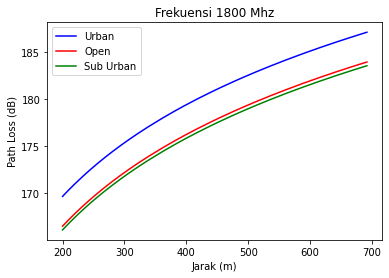

In [26]:
grafik1 = plt.figure()
plt.plot(d_sort,Urban_sort,'b', label='Urban')
plt.plot(d_sort,Open_sort,'r', label='Open')
plt.plot(d_sort,SubUrban_sort,'g', label='Sub Urban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Frekuensi 1800 Mhz')
grafik1.show()

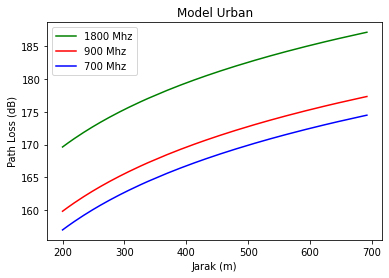

In [27]:
grafik2 = plt.figure()
plt.plot(d_sort,Urban_sort,'g', label='1800 Mhz')
plt.plot(d_sort,Urban2_sort,'r', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'b', label='700 Mhz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Model Urban')
grafik2.show()